In [1]:
import pandas as pd
import numpy as np


In [2]:

train_df = pd.read_excel('TrainingData.xlsx')
test_df = pd.read_excel('TestData.xlsx')

train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.7     119 non-null    object 
 1   3.8     119 non-null    float64
 2   6.7     119 non-null    float64
 3   2.2     119 non-null    object 
 4   2.0     119 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   4.8     29 non-null     float64
 1   3.1     29 non-null     float64
 2   1.6     29 non-null     float64
 3   0.2     29 non-null     float64
dtypes: float64(4)
memory usage: 1.0 KB


(None, None)

## Missing Values

In [3]:
# Replace missing values(?) with NaN
train_df.replace('?', np.nan, inplace=True)

# find columns with missing values(non-numeric values)
def find_missing_values(df):
    missing_values = []

    for col_index, col in enumerate(df.columns):
        missing_in_col = df[df[col].isnull()]
        for row_index in missing_in_col.index:
            label = df.iloc[row_index, -1]
            missing_values.append([row_index, col_index, label])

    missing_values_df = pd.DataFrame(missing_values, columns=['RowIndex', 'Feature', 'Label'])
    return missing_values_df

missing_values = find_missing_values(train_df)
missing_values

,RowIndex,Feature,Label
0,37,0,2
1,59,0,1
2,81,3,3


### Replace NaN values 
1. Simply remove/drop them
2. Replace them with mean/median/bootstraping(random sample from the same class same feature)
3. Using Random Forest based classification tree

### 1.simply remove/drop them

In [4]:
# remove NaN
train_df_drop = train_df.dropna()
train_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.7     116 non-null    float64
 1   3.8     116 non-null    float64
 2   6.7     116 non-null    float64
 3   2.2     116 non-null    float64
 4   2.0     116 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


### 2.Replace them with mean/median/bootstraping(random sample from the same class same feature)
#### (1) Mean/Median/Mode

In [5]:
# Mean
train_df_mean_na = train_df.fillna(train_df.mean())

# Median
train_df_media_na = train_df.fillna(train_df.median())

# Mode
train_df_mode_na = train_df.fillna(train_df.mode().iloc[0])

train_df_mean_na.info(), train_df_media_na.info(), train_df_mode_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.7     119 non-null    float64
 1   3.8     119 non-null    float64
 2   6.7     119 non-null    float64
 3   2.2     119 non-null    float64
 4   2.0     119 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.7     119 non-null    float64
 1   3.8     119 non-null    float64
 2   6.7     119 non-null    float64
 3   2.2     119 non-null    float64
 4   2.0     119 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  ----

(None, None, None)

#### (2) class random sampling

In [6]:
def Sto_Imp_fillna(df, seed=0):
    np.random.seed(seed) # set seed for reproducibility
    df = df.copy()
    class_label = df.columns[-1]
    # loop features
    for column in df.columns[:-1]:
        column_index = df.columns.get_loc(column)
        for label in df[class_label].unique():
            # find samples with NaN in this class label
            rows_with_nan = df[(df[class_label] == label) & (df[column].isnull())].index
            for row in rows_with_nan:
                # find valid samples with same class label as the NaN samples
                valid_samples = df[(df[class_label] == label) & (~df[column].isnull())]
                if not valid_samples.empty:
                    # random replace NaN with random value(fixed feature) from valid samples
                    replacement_value = valid_samples[column].sample(n=1).values[0]
                    df.at[row, column] = replacement_value
                    print(f"Replaced NaN at row {row}, column {column_index} with value {replacement_value} from label {label}")
                else:
                    print(f"No valid samples found for {label} in {column}")
                    pass
    return df

train_df_sto = Sto_Imp_fillna(train_df)
train_df_sto.info()

Replaced NaN at row 59, column 0 with value 4.7 from label 1
Replaced NaN at row 37, column 0 with value 7.7 from label 2
Replaced NaN at row 81, column 3 with value 1.5 from label 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.7     119 non-null    float64
 1   3.8     119 non-null    float64
 2   6.7     119 non-null    float64
 3   2.2     119 non-null    float64
 4   2.0     119 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


#### (3) random forest based classification tree

## Outliers
conduction on train set，but no test set. Because we are using classification tree, which is not sensitive to outliers.

In [7]:
def find_outliers(df):
    outliers = []
    df = df.copy()
    for col_index, col in enumerate(df.columns):
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outlier_condition = (df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)
            outliers_in_col = df[outlier_condition][col]
            for row_index, value in outliers_in_col.items():
                label = df.iloc[row_index, -1]
                outliers.append([row_index, col_index, label, value])

    outliers_df = pd.DataFrame(outliers, columns=['RowIndex', 'Feature', 'Label', 'OutlierValue'])
    return outliers_df

outliers = find_outliers(train_df_sto)
outliers

,RowIndex,Feature,Label,OutlierValue
0,94,0,1,10.6
1,51,1,1,4.1
2,96,1,1,4.4
3,89,2,2,16.0
4,115,3,3,5.3


### 1. Drop them

In [8]:
def remove_outliers(df, outliers):
    # get unique outlier rows
    outlier_rows = outliers['RowIndex'].unique()
    df_cleaned = df.drop(outlier_rows)
    return df_cleaned

train_df_drop_outliers = remove_outliers(train_df_sto, outliers)
train_df_drop_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.7     114 non-null    float64
 1   3.8     114 non-null    float64
 2   6.7     114 non-null    float64
 3   2.2     114 non-null    float64
 4   2.0     114 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.3 KB


### Imputation
#### 1. Mean/Median/Mode

In [9]:
# def impute_outliers_with_median(df, outliers):
#     for index, row in outliers.iterrows():
#         feature = row['Feature']
#         row_index = row['RowIndex']
#         if row_index not in df.index:
#             print(f"Row index {row_index} not found in DataFrame.")
#             continue
#         # calculate median value without outliers
#         median_value = df[~df.index.isin(outliers['RowIndex'])][feature].median()
#         # replace outlier with median value
#         df.at[row_index, feature] = median_value
#         print(f"Replaced outlier in row {row_index}, column {feature} with median value {median_value}")
#     return df

# train_df_impute_outliers = impute_outliers_with_median(train_df_bootstrap_na, outliers)


### 3. Cappinng

In [10]:
def cap_outliers(df, outliers):
    for index, row in outliers.iterrows():
        #feature as column index
        column = df.columns[int(row['Feature'])] # as integer
        # calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        value = df.at[row['RowIndex'], column]
        
        # cap outliers
        if row['OutlierValue'] < lower_bound:
            df.at[row['RowIndex'], column] = lower_bound
            print(f"Capped outlier in row {row['RowIndex']}, feature {row['Feature']}, value {value}, with lower bound {lower_bound}")
        elif row['OutlierValue'] > upper_bound:
            df.at[row['RowIndex'], column] = upper_bound
            print(f"Capped outlier in row {row['RowIndex']}, feature {row['Feature']}, value {value}, with upper bound {upper_bound}")
    return df

train_df_capped = cap_outliers(train_df_sto.copy(), outliers)
train_df_capped.info()

Capped outlier in row 94.0, feature 0.0, value 10.6, with upper bound 8.350000000000001
Capped outlier in row 51.0, feature 1.0, value 4.1, with upper bound 4.05
Capped outlier in row 96.0, feature 1.0, value 4.4, with upper bound 4.05
Capped outlier in row 89.0, feature 2.0, value 16.0, with upper bound 10.349999999999998
Capped outlier in row 115.0, feature 3.0, value 5.3, with upper bound 4.05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.7     119 non-null    float64
 1   3.8     119 non-null    float64
 2   6.7     119 non-null    float64
 3   2.2     119 non-null    float64
 4   2.0     119 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [11]:
train_df_capped.to_excel("bootcap.xlsx", index=False)

In [12]:
# print(train_df_bootstrap_na.columns)
# column = 2.2  # 假设这是造成问题的列名
# Q1 = train_df_bootstrap_na[column].quantile(0.25)
# Q3 = train_df_bootstrap_na[column].quantile(0.75)
# IQR = Q3 - Q1
# upper_bound = Q3 + 1.5 * IQR

# print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Upper Bound: {upper_bound}")

In [13]:
train_head_df = pd.read_excel('TrainHead.xlsx')
print(train_head_df.iloc[:, -1].value_counts())
# train_head_df.info(), test_df.info()
train_head_df.head()

label
3    41
1    40
2    39
Name: count, dtype: int64


,feature1,feature2,feature3,feature4,label
0,7.7,3.8,6.7,2.2,2
1,5,2.3,3.3,1,3
2,5,3.4,1.6,0.4,1
3,4.9,3.1,1.5,0.2,1
4,5.4,3.9,1.3,0.4,1


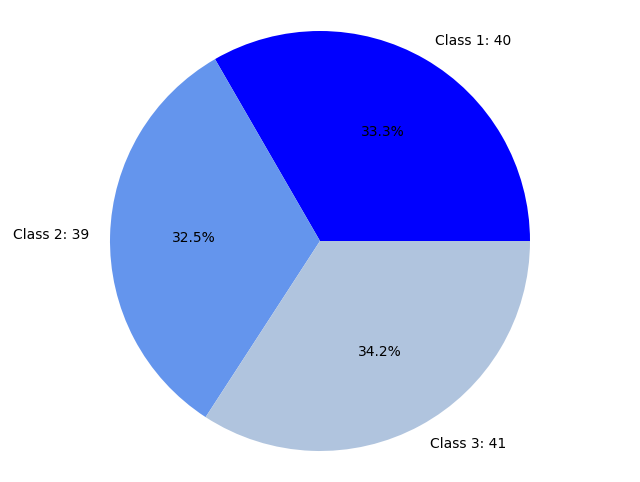

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# 手动创建一个类别分布的字典
class_distribution = pd.Series({
    1: 40,
    2: 39,
    3: 41
})

# Define a nice color palette
colors = ['blue','cornflowerblue','lightsteelblue','#ffcc99']

labels_with_counts = [f'Class {label}: {count}' for label, count in zip(class_distribution.keys(), class_distribution.values)]

# Plot pie chart with new labels
plt.figure(figsize=(8, 6))
plt.pie(class_distribution.values, labels=labels_with_counts, colors=colors, autopct='%1.1f%%')

# plt.title('Class Distribution in Training Data')
plt.axis('equal') 

plt.show()

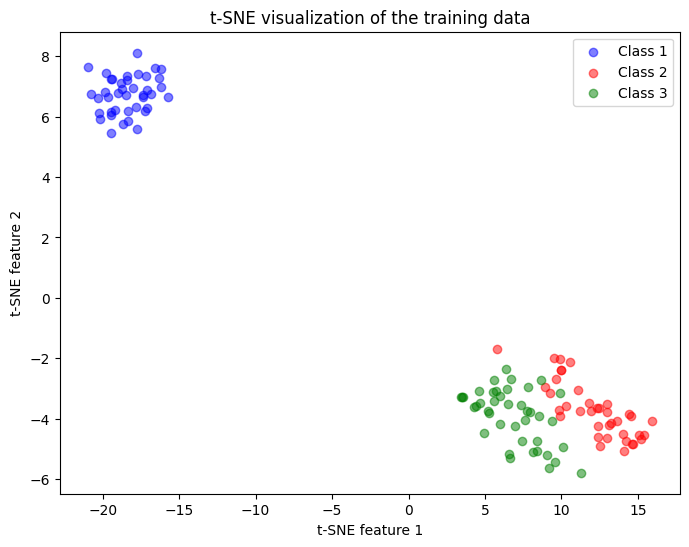

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)  
tsne_results = tsne.fit_transform(train_df_capped.iloc[:, :-1])  

df_tsne = pd.DataFrame(data=tsne_results, columns=['t-SNE feature 1', 't-SNE feature 2'])

df_tsne['Label'] = train_df_capped.iloc[:, -1]


plt.figure(figsize=(8, 6))
colors = {1: 'blue', 2: 'red', 3: 'green'}  # color
for label, color in colors.items():
    subset = df_tsne[df_tsne['Label'] == label]
    plt.scatter(subset['t-SNE feature 1'], subset['t-SNE feature 2'], c=color, label=f'Class {label}', alpha=0.5)

plt.title('t-SNE visualization of the training data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()